# Human-level control through deep reinforcement learning

![Texte alternatif…](https://media.discordapp.net/attachments/505714807291379724/525388603375878145/Breakout-Atari-2600-Wallpaper.gif?width=400&height=248)

*The theory ofreinforcementlearning provides a normative account , deeply rooted in psychological and neuroscientific perspectives on animal behaviour, of how agents may optimize their control of an environment.Touse reinforcementlearning successfully insituations approaching real-world complexity, however, agents are confronted with a difficulttask:they must derive efficientrepresentations ofthe environment from high-dimensional sensory inputs, and use these to generalize past experience tonewsituations.Remarkably, humans and other animalsseem to solve this problem through a harmonious combination ofreinforcementlearning andhierarchicalsensoryprocessing systems , the former evidenced by a wealth of neural data revealingnotableparallelsbetweenthe phasic signals emittedbydopaminergic neurons and temporal difference reinforcement learning algorithms .While reinforcementlearning agents have achievedsome successesina variety of domains ,their applicability has previously beenlimited to domainsinwhich usefulfeatures can be handcrafted, or to domains with fully observed, low-dimensional state spaces. Here we use recent advancesin training deep neural networks to develop a novel artificial agent, termed a deep Q-network, that can learnsuccessfulpoliciesdirectly fromhigh-dimensionalsensory inputs using end-to-end reinforcement learning. We tested this agent on the challenging domain of classic Atari 2600 games. We demonstrate that the deep Q-network agent, receiving only the pixels and the game score as inputs, was able to surpass the performance of all previous algorithms and achieve a level comparable to that of a professional humangamestester across a set of 49 games,using the same algorithm, network architecture and hyperparameters. This work bridges the divide between high-dimensional sensory inputs and actions,resulting in the first artificial agent that is capable of learning to excel at a diverse array of challenging tasks.*


> **Les succès du renforcement se limitaient (Avant ~ 2012/2013) à la résolution de tâche avec des inputs travaillés et à des espaces dimensionnels réduit.**

> **Méthode : deep Q-Network "end to end reinforcment learning". L'apprentissage est fait de bout en bout en renforcement.**

> **Résultat : un agent ayant seulement accès aux pixels de l'image est capable de surpasser tout les algorithmes précédemment mit en place et d'atteindre un score relativement égal ou meilleur que des joueurs pros sur 49 Jeux d'Atari. Texte en gras**

*We set out to create a single algorithm that would be able to develop a wide range of competencies on a varied range of challenging tasks—a central goal of general artificial intelligence that has eluded previous effort. To achieve this,we developed anovel agent, a deepQ-network (DQN), which is able to combine reinforcement learning with a class of artificial neural network known as deep neural networks. Notably, recent advances in deep neural networks, in which several layers of nodes are used to build up progressively more abstractrepresentations of the data, have made it possible for artificial neural networksto learn concepts such as object categories directly from raw sensory data. We use one particularly successful architecture, the deep convolutional network, which uses hierarchical layers of tiled convolutional filters to mimic the effects ofreceptive fields—inspired byHubel andWiesel’s seminalwork on feedforward processing inearly visual cortex —thereby exploiting the localspatial correlations present in images, and building in robustness*

> **Le but : obtenir un agent capable d'apprendre sur un énorme set d'environnement. Pour cela, ils ont décider de recourir au réseau de neuronne grâce à leur capacité de créer une représentation abstraire des données d'entrées**

> ** Architecture : Deep Convolutional, neural network..**

![Texte alternatif…](https://media.springernature.com/full/nature-static/assets/v1/image-assets/nature14236-f1.jpg)



![Texte alternatif…](https://pbs.twimg.com/media/B_PrYU3U0AAtL1K.png)


*We considertasksin which the agent interacts with an environment through a sequence of observations, actions and rewards.The goal of the agent isto select actions in a fashion that maximizes cumulative future reward. More formally,we use a deep convolutional neural network to approximate the optimal action-value function.*


> **L'agent est exposé à des séquences d'observation et récompense. Le but de l'agent est de sélectionner les actions de manière à maximiser le nombre de futures récompenses obtenu. Le modèle réalisant l'approximation de la fonction optimal calculant l'espérance de chaque action est donné par un réseau de neurones.. **

![Texte alternatif…](https://github.com/thibo73800/aihub/blob/master/images/optimal_action_value_function.png?raw=true)


*Reinforcement learning is known to be unstable or even to diverge when a nonlinear function approximator such as a neural network is used to represent the action-value (also known as Q) function20 . This instability has several causes: the correlations present in the sequence of observations,the fact that small updates toQ may significantly change the policy and therefore change the data distribution, and the correlations between the action-values(Q) and the target value. We addressthese instabilitieswith a novel variant of Q-learning,which uses two key ideas. F*
*First, we used a biologically inspired mechanism termed experience replay that randomizes over the data, thereby removing correlationsin the observation sequence and smoothing over changesin the data distribution.
Second,we used an iterative update that adjusts the action-values (Q) towards target values that are only periodically updated, thereby reducing correlations with the target.*

**>L'apprentissage par renforcement est instable ou diverge lorsqu'on introduit une fonction non-linéaire est utilisé pour faire l'approximation de la Q fonction. **

**>L'instabilité à deux causes, la corrélation présente dans la séquence observé. **

**>  Le fait qu'on l'on soit constamment en train de modifier Q, ce qui change la "policy" (les décisions que l'on prend) et ainsi change la distribution des données continuellement.**

**> Et enfin, la corrélation direct entre l'approximation que l'onf fait de la Q function et la target. (voir formule).**

![Texte alternatif…](https://github.com/thibo73800/aihub/blob/master/images/q_function_loss_without_target.png?raw=true)

### Solutions:

> **Expérience replay : supprime la corrélation dans les données et réalise un changement moins brutal dans la distribution des données..**

> **Target network: Utilise une copie de notre fonction Q pour calculer la target, et modifier cette copie seulement périodiquement pour ne pas sans cesse changer la target dans la formule d'erreur.**

![Texte alternatif…](https://github.com/thibo73800/aihub/blob/master/images/q_learning_loss_with_target.png?raw=true)

#Install dependencies

In [1]:
%matplotlib inline

from collections import deque, namedtuple
from gym.wrappers import Monitor
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import itertools
import random
import gym
import os
import sys

In [2]:
VALID_ACTIONS = [0, 1, 2, 3]


from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

2022-05-24 00:04:54.113821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 00:04:54.113928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['/device:GPU:0']

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



## Préprocessing:

*Preprocessing. Working directlywith rawAtari 2600 frames,which are 2103 160 pixel images with a 128-colour palette, can be demanding in terms of computation and memory requirements.We apply a basic preprocessing step aimed atreducing the input dimensionality and dealing with some artefacts of the Atari 2600 emulator. First,to encode a single framewe take themaximum value for each pixel colour value overthe frame being encoded and the previousframe. This was necessary to remove flickering that is present in games where some objects appear only in even frames while other objects appear only in odd frames, an artefact caused by the limited number of sprites Atari 2600 can display at once. Second, we then extract the Y channel, also known as luminance, from the RGB frame and rescale it to 84 3 84.The function w from algorithm 1 described belowappliesthis preprocessing to the m most recent frames and stacks them to produce the input to the Q-function, inwhichm 5 4, although the algorithm isrobust to different values of m (for example, 3 or 5).*

> **Image en noir et blanc**

> ** Image réduit à 84*84 **

> ** On stack les 4 dernière images perçu. On à donc une image de (84, 84, 4) **

In [3]:
class StateProcessor():

    def __init__(self):
      with tf.compat.v1.variable_scope("process"):
        self.input_state = tf.compat.v1.placeholder(shape=[210, 160, 3], dtype=tf.uint8, name="input_process")
        self.output = tf.image.rgb_to_grayscale(self.input_state)
        self.output = tf.image.crop_to_bounding_box(self.output, 34, 0, 160, 160)
        self.output = tf.compat.v1.image.resize_images(    
        self.output, [84, 84], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        self.output = tf.squeeze(self.output)

    def process(self, sess, state):
        return sess.run(self.output, { self.input_state: state })

### Test the environement

In [4]:
import gym
import time

env = gym.make('Breakout-v0')
env.reset()

for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())
    if done:
        break

## Display and process the observation

2022-05-24 00:05:14.345626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 00:05:14.345669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-24 00:05:14.349089: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


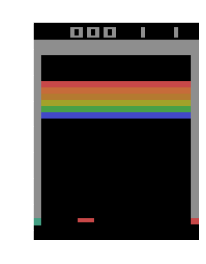

2022-05-24 00:05:14.490288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


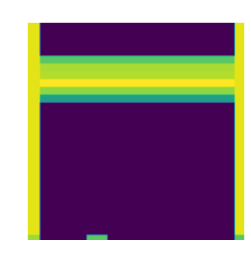

In [5]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  
  plt.title("Original observation")
  plt.imshow(observation)
  plt.show()

  state_processor = StateProcessor()
  process_obs = state_processor.process(sess, observation)
  
  plt.title("Process observation")
  plt.imshow(process_obs)
  plt.show()



# DQN: Deep Q Network


*There are several possible ways of parameterizing Q using a neural network. Because Q maps history–action pairs to scalar estimates of their Q-value, the history and the action have been used as inputsto the neural network by some previous approaches 24,26 . The main drawback of this type of architecture is that a separate forward pass is required to compute the Q-value of each action, resulting in a cost thatscaleslinearlywith the number of actions.We instead use an architecture in which there is a separate output unit for each possible action, and only the state representation is an input to the neural network. The outputs correspond to the predicted Q-values of the individual actions forthe inputstate. The main advantage of thistype of architecture isthe ability to compute Q-valuesfor all possible actionsin a given statewith only a single forward passthrough the network. The exact architecture, shown schematically in Fig. 1, is as follows. The input to the neural network consists of an 843 843 4 image produced by the preprocessing map w. The first hidden layer convolves 32 filters of 8 3 8 with stride 4with the input image and applies a rectifier nonlinearity31,32 . The second hidden layer convolves 64 filters of 4 3 4 with stride 2, again followed by a rectifier nonlinearity. Thisisfollowed by a third convolutional layerthat convolves 64 filters of 3 3 3with stride 1 followed by a rectifier. The final hidden layer is fully-connected and consists of 512 rectifier units. The output layer is a fully-connected linear layer with a single output for each valid action. The number of valid actions varied between 4 and 18 on the games we considered. *

> **Input (84, 84, 4) **

> **Convolution 32 filtres de 8*8 et des strides de 4 avec relu activation **

> **Convolution 64 filtres de 4*4 avec des strides de 2 et une activation par relu**

> **Convolution 64 filtres de 3*3 avec stride de 1 avec une activation par relu**

> **Hidden layer: 542 avec activation par relu**

> **Output layer: activation linéair avec autant d'unité que le nombre d'action disponible.**

![Texte alternatif…](https://github.com/thibo73800/aihub/blob/master/images/q_learning_loss_with_target.png?raw=true)

In [32]:
class DQN():

    def __init__(self, scope):
      self.scope = scope
      with tf.compat.v1.variable_scope(self.scope):
        self._build_model()

    def _build_model(self):
        # 4 Last frames of the game
        self.X_pl = tf.compat.v1.placeholder(shape=[None, 84, 84, 4], dtype=tf.uint8, name="X")
        # The TD target value
        self.y_pl = tf.compat.v1.placeholder(shape=[None], dtype=tf.float32, name="y")
        # Integer id of which action was selected
        self.actions_pl = tf.compat.v1.placeholder(shape=[None], dtype=tf.int32, name="actions")

        # Rescale the image
        X = tf.compat.v1.to_float(self.X_pl) / 255.0
        # Get the batch size
        batch_size = tf.shape(self.X_pl)[0]

        # Three convolutional layers
        conv1 = tf.compat.v1.layers.conv2d(X, 32, 8, 4, activation=tf.nn.relu)
        conv2 = tf.compat.v1.layers.conv2d(conv1, 64, 4, 2, activation=tf.nn.relu)
        conv3 = tf.compat.v1.layers.conv2d(conv2, 64, 3, 1, activation=tf.nn.relu)

        # Fully connected layers
        flattened = tf.compat.v1.layers.flatten(conv3)
        fc1 = tf.compat.v1.layers.dense(flattened, 512, activation=tf.nn.relu)
        self.predictions = tf.compat.v1.layers.dense(fc1, len(VALID_ACTIONS))
        tf.identity(self.predictions, name="predictions")

        # Get the predictions for the chosen actions only
        gather_indices = tf.range(batch_size) * tf.shape(self.predictions)[1] + self.actions_pl
        self.action_predictions = tf.gather(tf.reshape(self.predictions, [-1]), gather_indices)

        # Calculate the loss
        self.losses = tf.compat.v1.squared_difference(self.y_pl, self.action_predictions)
        self.loss = tf.reduce_mean(self.losses)

        # Optimizer Parameters from original paper
        self.optimizer = tf.compat.v1.train.RMSPropOptimizer(0.00025, 0.99, 0.0, 1e-6)
        self.train_op = self.optimizer.minimize(self.loss)

    def predict(self, sess, s):
        return sess.run(self.predictions, { self.X_pl: s })

    def update(self, sess, s, a, y):
        feed_dict = { self.X_pl: s, self.y_pl: y, self.actions_pl: a }
        ops = [self.train_op, self.loss]
        _, loss = sess.run(ops, feed_dict)
        return loss

### Copy Target Network


In [43]:
def copy_model_parameters(sess, estimator1, estimator2):
    e1_params = [t for t in tf.compat.v1.trainable_variables() if t.name.startswith(estimator1.scope)]
    e1_params = sorted(e1_params, key=lambda v: v.name)
    e2_params = [t for t in tf.compat.v1.trainable_variables() if t.name.startswith(estimator2.scope)]
    e2_params = sorted(e2_params, key=lambda v: v.name)

    update_ops = []
    for e1_v, e2_v in zip(e1_params, e2_params):
        op = e2_v.assign(e1_v)
        update_ops.append(op)

    sess.run(update_ops)

### Create model

In [44]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

# DQN
dqn = DQN(scope="dqn")
# DQN target
target_dqn = DQN(scope="target_dqn")


# State processor
state_processor = StateProcessor()


/var/folders/vw/2g_98rts7tzczmvh5hqt_qn00000gn/T/ipykernel_33554/794254304.py:22: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv1 = tf.compat.v1.layers.conv2d(X, 32, 8, 4, activation=tf.nn.relu)
/Users/rky/miniforge3/envs/env-tf/lib/python3.9/site-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/var/folders/vw/2g_98rts7tzczmvh5hqt_qn00000gn/T/ipykernel_33554/794254304.py:23: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv2 = tf.compat.v1.layers.conv2d(conv1, 64, 4, 2, activation=tf.nn.relu)
/var/folders/vw/2g_98rts7tzczmvh5hqt_qn00000gn/T/ipykernel_33554/794254304.py:24: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future 

### Hyperparameters

In [45]:
num_episodes = 10000

replay_memory_size = 250000
replay_memory_init_size = 50000

update_target_estimator_every = 10000

epsilon_start = 1.0
epsilon_end = 0.1


epsilon_decay_steps = 500000
discount_factor = 0.99
batch_size = 32

### Epsilon greedy

In [36]:
def make_epsilon_greedy_policy(estimator, nA):
    def policy_fn(sess, observation, epsilon):
        A = np.ones(nA, dtype=float) * epsilon / nA
        q_values = estimator.predict(sess, np.expand_dims(observation, 0))[0]
        best_action = np.argmax(q_values)
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [37]:
#saver = tf.train.Saver()
start_i_episode = 0
opti_step = -1

# The replay memory
replay_memory = []



# Algorithm

![Texte alternatif…](https://github.com/thibo73800/aihub/blob/master/images/algorithm_q_learning.png?raw=true)

In [42]:

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
  
    Transition = namedtuple("Transition", ["state", "action", "reward", "next_state", "done"])


    # Used to save the model
    checkpoint_dir = os.path.join("./", "checkpoints")
    checkpoint_path = os.path.join(checkpoint_dir, "model")

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    saver = tf.compat.v1.train.Saver()
    # Load a previous checkpoint if we find one
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)

    #  Epsilon decay
    epsilons = np.linspace(epsilon_start, epsilon_end, epsilon_decay_steps)
    
    # Policy
    policy = make_epsilon_greedy_policy(dqn, len(VALID_ACTIONS))
    
    epi_reward = []
    best_epi_reward = 0
    
    for i_episode in range(start_i_episode, num_episodes):      
        # Reset the environment
        state = env.reset()
        state = state_processor.process(sess, state)
        state = np.stack([state] * 4, axis=2)
        loss = None
        done = False
        r_sum = 0
        mean_epi_reward = np.mean(epi_reward)
        if best_epi_reward < mean_epi_reward:
            best_epi_reward = mean_epi_reward
            saver.save(tf.compat.v1.get_default_session(), checkpoint_path)
        
        len_replay_memory = len(replay_memory)
        while not done:
            # Get the epsilon for this step
            epsilon = epsilons[min(opti_step+1, epsilon_decay_steps-1)]
        
        
            # Update the target network
            if opti_step % update_target_estimator_every == 0:
                copy_model_parameters(sess, dqn, target_dqn)
            
            print("\r Epsilon ({}) ReplayMemorySize : ({}) rSum: ({}) best_epi_reward: ({}) OptiStep ({}) @ Episode {}/{}, loss: {}".format(epsilon, len_replay_memory, mean_epi_reward, best_epi_reward, opti_step, i_episode + 1, num_episodes, loss), end="")
            sys.stdout.flush()
            
            
            #  Select an action with eps-greedy
            action_probs = policy(sess, state, epsilon)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)

            # Step in the env with this action
            next_state, reward, done, _ = env.step(VALID_ACTIONS[action])
            r_sum += reward
            
            # Add this action to the stack of images
            next_state = state_processor.process(sess, next_state)
            next_state = np.append(state[:,:,1:], np.expand_dims(next_state, 2), axis=2)
            
            # If our replay memory is full, pop the first element
            if len(replay_memory) == replay_memory_size:
                replay_memory.pop(0)
            
            
            # Save transition to replay memory
            replay_memory.append(Transition(state, action, reward, next_state, done))
            
            if len_replay_memory > replay_memory_init_size:
                # Sample a minibatch from the replay memory
                samples = random.sample(replay_memory, batch_size)                
                states_batch, action_batch, reward_batch, next_states_batch, done_batch = map(np.array, zip(*samples))
            
                # We compute the next q value with                
                q_values_next_target = target_dqn.predict(sess, next_states_batch)
                t_best_actions = np.argmax(q_values_next_target, axis=1)
                targets_batch = reward_batch + np.invert(done_batch).astype(np.float32) * discount_factor * q_values_next_target[np.arange(batch_size), t_best_actions]
                
                # Perform gradient descent update
                states_batch = np.array(states_batch)
                loss = dqn.update(sess, states_batch, action_batch, targets_batch)
                
                opti_step += 1
                
            state = next_state
            if done:
              break

        epi_reward.append(r_sum)
        if len(epi_reward) > 100:
            epi_reward = epi_reward[1:]

 Epsilon (1.0) ReplayMemorySize : (230) rSum: (nan) best_epi_reward: (0) OptiStep (-1) @ Episode 1/10000, loss: None

2022-05-24 00:15:50.320244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 00:15:50.320270: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-24 00:15:50.329324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-24 00:15:50.489962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/Users/rky/miniforge3/envs/env-tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dt

 Epsilon (1.0) ReplayMemorySize : (675) rSum: (5.0) best_epi_reward: (5.0) OptiStep (-1) @ Episode 2/10000, loss: None

2022-05-24 00:15:53.351129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 Epsilon (1.0) ReplayMemorySize : (50301) rSum: (1.64) best_epi_reward: (5.0) OptiStep (-1) @ Episode 197/10000, loss: None00, loss: None

2022-05-24 00:20:58.391576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-24 00:20:58.695387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


AttributeError: module 'tensorflow' has no attribute 'trainable_variables'

In [ ]:
import os
print(os.listdir("./checkpoints"))

In [ ]:
from google.colab import files
import time

print(os.listdir("./checkpoints"))

for filename in os.listdir("./checkpoints"):
  print("Download", filename)
  files.download(os.path.join("./checkpoints", filename))